In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme("paper")
sns.set_color_codes("deep")

In [2]:
# Load the dataset
df = pd.read_csv("/home/inventor/Datasets/Mall Customer/mall_customer/Mall_Customers.csv")

In [3]:
# Sample of dataset
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Shape of dataset
df.shape

(200, 5)

In [5]:
# Info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# Description about dataset
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
# Find Missing value
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
# Duplicated Rows
df.duplicated().sum()

np.int64(0)

In [16]:
# Rename the Feature Name :
df.rename({"Annual Income (k$)":"Income"}, axis=1, inplace=True)
df.rename({"Spending Score (1-100)":"Score"}, axis=1, inplace=True)

In [17]:
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


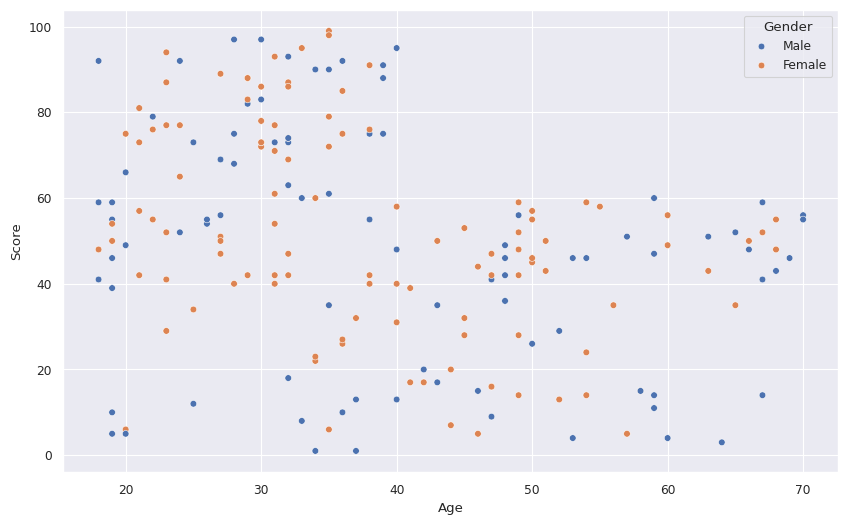

In [19]:
# Exploration of dataset

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Age", y="Score", hue="Gender")
plt.show()

<Axes: xlabel='Income', ylabel='Score'>

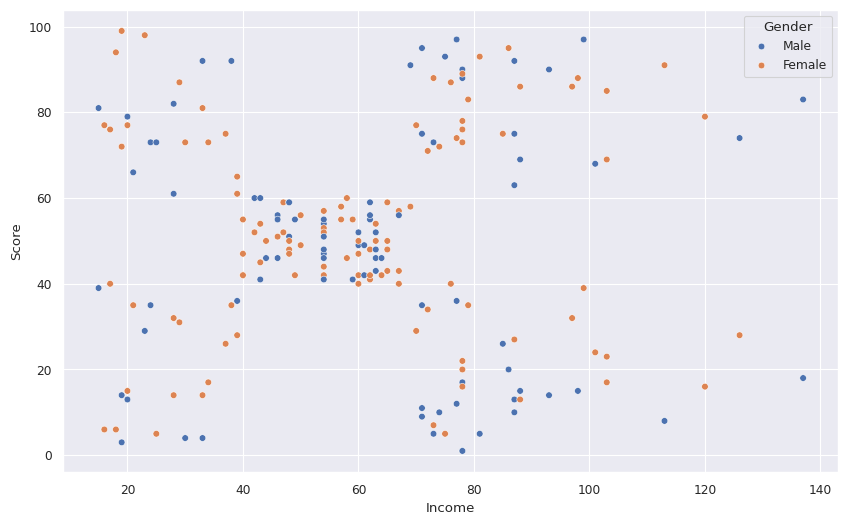

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Income", y="Score", hue="Gender")

<Axes: xlabel='Gender', ylabel='Score'>

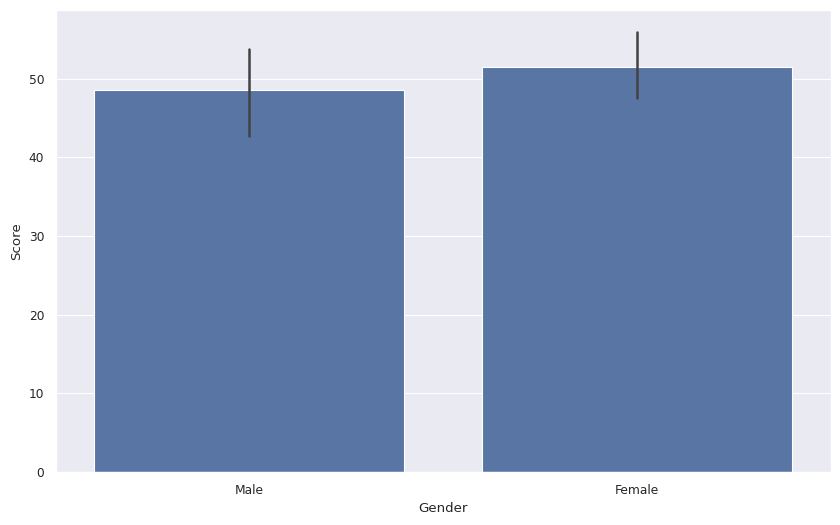

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Gender", y="Score")

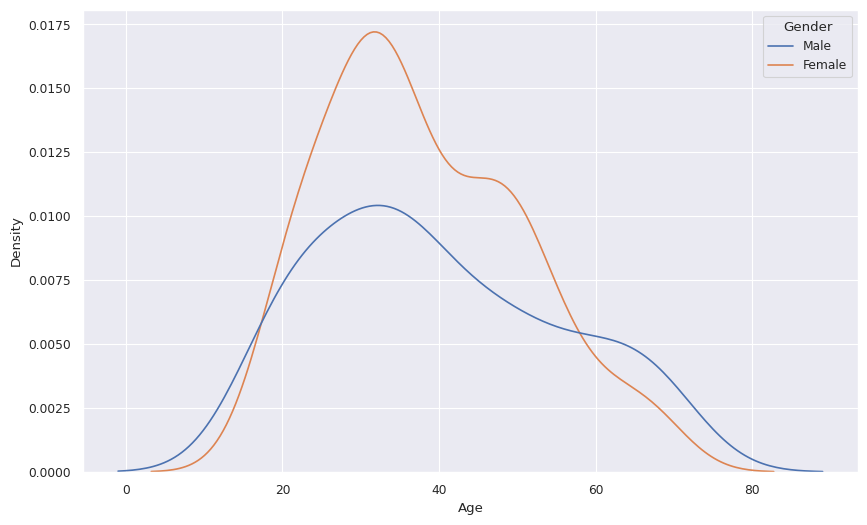

In [25]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="Age", hue="Gender")
plt.show()

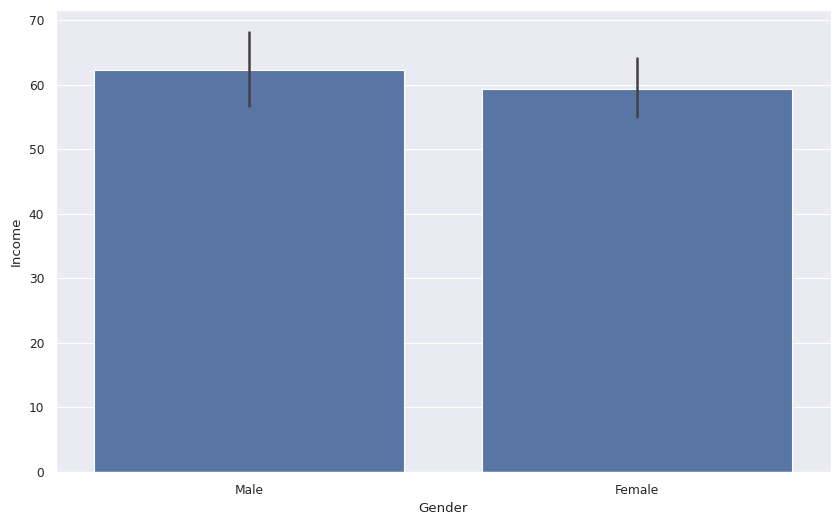

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Gender", y="Income")
plt.show()

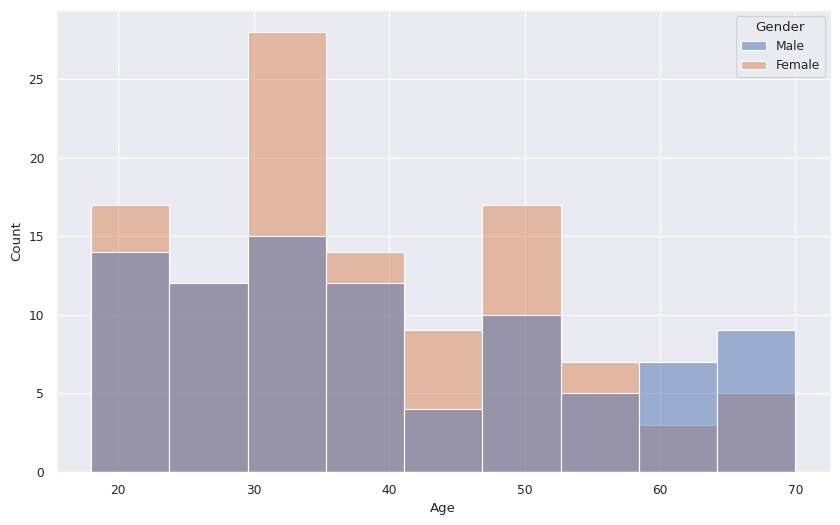

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(x=df["Age"], hue=df["Gender"])
plt.show()

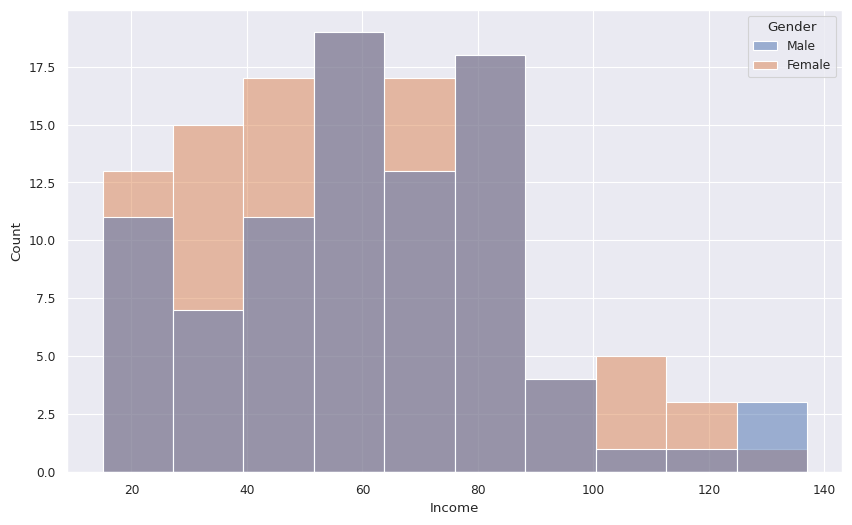

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Income", hue="Gender")
plt.show()

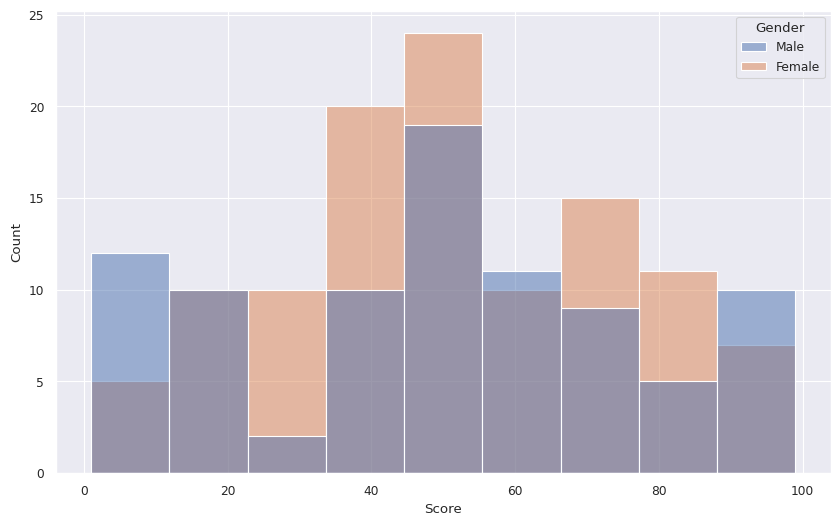

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Score", hue="Gender")
plt.show()

<Axes: xlabel='Age', ylabel='Score'>

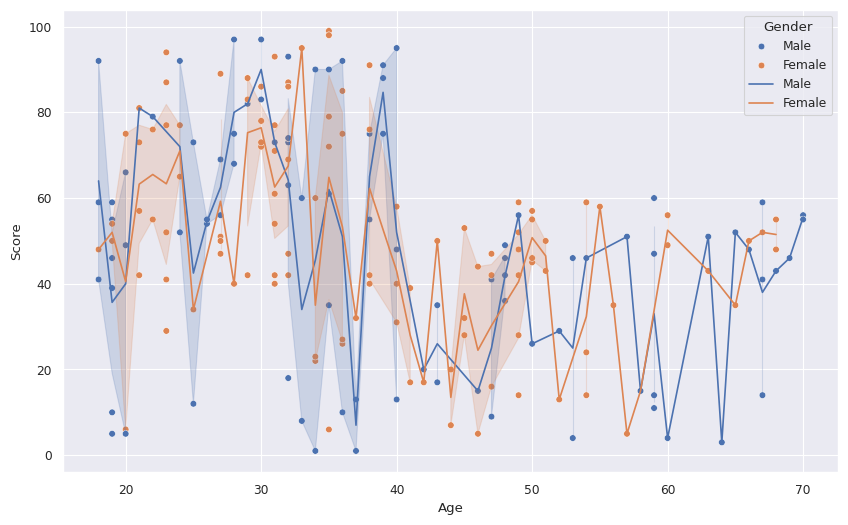

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Age", y="Score", hue="Gender")
sns.lineplot(data=df, x="Age", y="Score", hue="Gender", markers="o")

In [45]:
from sklearn.cluster import KMeans

In [50]:
X = df.iloc[:, -2:]

X

,Income,Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


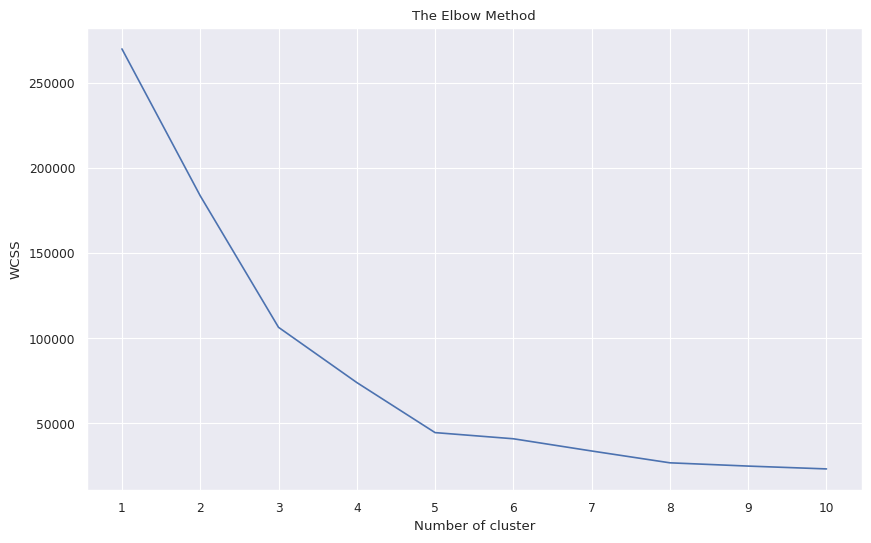

In [52]:
# Elbow Method 
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of cluster")
plt.xticks(np.arange(1, 11, 1))
plt.ylabel("WCSS")
plt.show()

In [53]:
kmeans  = KMeans(n_clusters=5, init="k-means++", random_state=42)
df["label_KMC"] = kmeans.fit_predict(df.iloc[:, -2:])

In [54]:
df.head()

,CustomerID,Gender,Age,Income,Score,label_KMC
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


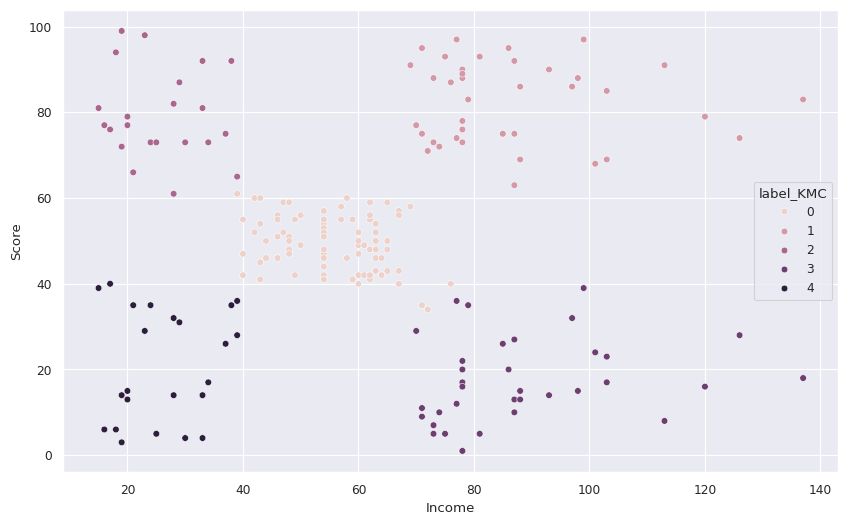

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Income", y="Score", hue="label_KMC")
plt.show()